In [1]:
import pandas as pd
import numpy as np
from pandas.core.common import flatten
from plotnine import *
from array import *
import scipy.stats as stats
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

Una vez cargadas las librerías necesarias, el primer paso consiste en cargar el archivo
en un data.frame mediante la función pd.read_csv(). Cuando se explora un conjunto
de datos por primera vez es conveniente realizar el método .describe() sobre el mismo.

In [2]:
# cargar base----------------------------------------------------
rls_ex1 = pd.read_csv("rls_ex1.csv")
# describir base-------------------------------------------------
rls_ex1.describe()

,x,y
count,34.000000,34.000000
mean,86.478831,523.345975
std,60.683849,443.033484
min,11.761794,89.704189
25%,48.386186,177.947704
50%,73.586046,367.889547
75%,114.434185,793.047566
max,243.544835,1833.782283


Se observa que se tienen 34 observaciones y que no existen datos faltantes. Ahora, se
comprueba visualmente en un gráfico de dispersión, en la Figura 3, si existe alguna
relación entre X e Y .

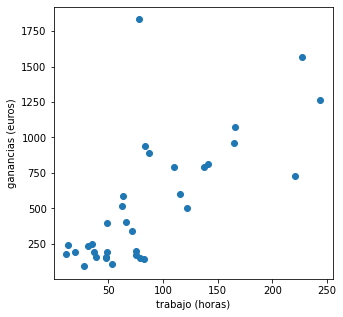

In [3]:
# pintar x e y---------------------------------------------------
fig = plt.figure(figsize=(5,5))
plt.scatter(rls_ex1.x, rls_ex1.y)
# definir ejes---------------------------------------------------
plt.xlabel("trabajo (horas)")
plt.ylabel("ganancias (euros)")
# mostrar grafico------------------------------------------------
plt.show()

Se aprecia que podría existir una correlación lineal entre ambas variables, a pesar de
que hay un dato que podría ser un outlier. Se procede a ajustar un modelo de regresión
lineal con el paquete Scikit-Learn. Para poder introducir las variables en el modelo de
regresión es necesario definirlas como un array de 2 dimensiones. Esto se logra con el
método .values.reshape(-1, 1).

In [4]:
# extraer variables y convertir en np.array----------------------
x = rls_ex1["x"].values.reshape(-1,1)
# x.shape
y = rls_ex1["y"].values.reshape(-1,1)
# y.shape
# crear el modelo------------------------------------------------
lm1 = linear_model.LinearRegression()
lm1.fit(x, y)
# se pueden obtener los coeficientes-----------------------------

LinearRegression()

In [5]:
print("Beta1: ", lm1.coef_)
print("Beta0: ", lm1.intercept_)

Beta1:  [[5.1591244]]
Beta0:  [77.19092689]


${Y = 77.19 + 5.16 · X}$

La recta de regresión obtenida se puede introducir en la gráfica anterior, obteniéndose
el resultado que se observa en la Figura 4. Hay que tener en cuenta que para poder
dibujar la recta de regresión es necesario antes definir una variable que contenga los
valores ajustados de y, es decir, los ŷ del modelo. En el código se ha definido a este
array como y pred .

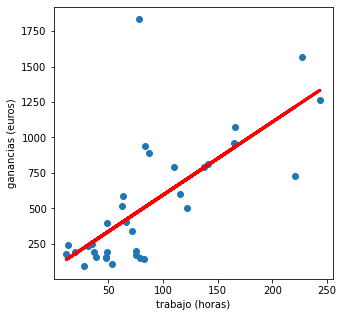

In [6]:
# obtener valores modelo-----------------------------------------
# pintar x e y---------------------------------------------------
fig = plt.figure(figsize=(5,5))
plt.scatter(rls_ex1.x, rls_ex1.y)
# pintar recta de regresion--------------------------------------
y_pred = lm1.predict(x)
plt.plot(rls_ex1.x, y_pred, color='red', linewidth=3)
# definir ejes---------------------------------------------------
plt.xlabel("trabajo (horas)")
plt.ylabel("ganancias (euros)")
# mostrar grafico------------------------------------------------
plt.show()

También se puede obtener el coeficiente de determinación, R 2 , del modelo. El coeficien-
te de determinación se puede calcular mediante la función de Scikit-Learn r2_score(),
en la cual debemos introducir como argumentos los valores reales de la muestra ob-
servada de la Variable Y , es decir, la variable (el array) y en Python, y la variable y pred ,
que se ha empleado para dibujar la recta de regresión.

In [12]:
# extraer R2-----------------------------------------------------
print("Coeficiente de det. R2: %.2f"
% r2_score(y, y_pred))

Coeficiente de det. R2: 0.50


Este resultado indica que existe asociación entre la variable predictora y la variable
respuesta, pero el modelo no consigue explicar, aproximadamente, la mitad de la
varianza total, en términos de suma de cuadrados de la respuesta.

In [13]:
print("Varianza del modelo, s2: %.2f"% mean_squared_error(y, y_pred))

Varianza del modelo, s2: 95372.31


In [14]:
# estimador de la varianza por MLE
y_resta = (y - y_pred) ** 2
sum(y_resta)/34

array([95372.31261032])

In [15]:
# estimador de la varianza por OLS
y_resta = (y - y_pred) ** 2
sum(y_resta)/32

array([101333.08214846])

Para comprobar la bondad del ajuste del modelo, aparte del coeficiente de determinación y de la varianza, se puede realizar un gráfico (ver Figura 5) donde se comparan los
valores reales de la muestra frente a los valores del ajuste. Cuanto más se aproximen
los puntos del gráfico de dispersión a la bisectriz del primer cuadrante, mejor será el
ajuste del modelo.

/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


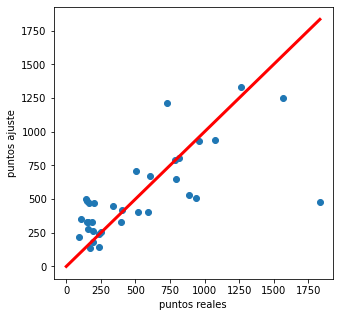

In [16]:
# pintar reales vs predichos
fig = plt.figure(figsize=(5,5))
plt.scatter(y, y_pred)
plt.xlabel("puntos reales")
plt.ylabel("puntos ajuste")
plt.plot([0, max(y)], [0, max(y)], color = 'red', linewidth = 3)
plt.show()

Por último, se realiza la comprobación del modelo. Para ello, se procede al análisis de
sus residuos, representados en la Figura 6.

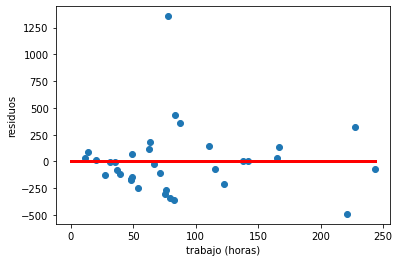

In [17]:
# obtener residuos-----------------------------------------------
residuos1 = y - y_pred
plt.scatter(x, residuos1)
plt.xlabel("trabajo (horas)")
plt.ylabel("residuos")
plt.plot([0, max(x)], [0, 0], color = 'red', linewidth = 3)
plt.show()

Gráficamente, los residuos se distribuyen sin tendencia apreciable, pero con un outlier
entre las 50 y las 100 horas, por lo que podemos sospechar de que se cumpla la
normalidad. A continuación, se aplican los test vistos en el tema 2, la prueba de Shapiro-
Wilk, para comprobar la normalidad; y la prueba de Breusch-Pagan, para comprobar la
homogeneidad de la varianza.

In [18]:
# se realiza la prueba s-w---------------------------------------
sh_result = stats.shapiro(residuos1)
# dar formato a la salida----------------------------------------
print("Test Shapiro-Wilk, p.valor: %5.5f" %(sh_result.pvalue))

Test Shapiro-Wilk, p.valor: 0.00002


In [19]:
# y1-------------------------------------------------------------
m1 = sm.OLS(y, sm.add_constant(x)).fit()
bp1 = sms.het_breuschpagan(resid = m1.resid,
exog_het = m1.model.exog)[1]
print("El resultado del test Breusch-Pagan es: p.valor = %5.3f"%(bp1))

El resultado del test Breusch-Pagan es: p.valor = 0.834


Con los resultados de los test, se comprueba la homegeneidad de la varianza de los
residuos, pero no su normalidad. Por lo tanto, sería necesario estudiar la procedencia
del outlier para ver si se trata de un dato bien tomado o de un error grosero. Solo en
este segundo caso debería eliminarse. Si no es posible eliminar el punto anómalo, cabría
plantearse cambiar de modelo de regresión, realizar alguna transformación sobre la
variable Y , buscar alguna otra variable predictora que fuera relevante y añadirla al
modelo o aplicar algún método de regresión avanzada como los que veremos en el
Tema 6.